In [1]:
import os
os.chdir('/Users/jonas/Desktop/Books/Think Stats 2 - Allen B Downey/ThinkStats2-master/code')

In [2]:
from __future__ import print_function, division


import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

In [3]:
live, firsts, others = first.MakeFrames()

In [4]:
first_wgt = firsts.totalwgt_lb
first_wgt_dropna = first_wgt.dropna()
print('Firsts', len(first_wgt), len(first_wgt_dropna))
 
other_wgt = others.totalwgt_lb
other_wgt_dropna = other_wgt.dropna()
print('Others', len(other_wgt), len(other_wgt_dropna))

first_pmf = thinkstats2.Pmf(first_wgt_dropna, label='first')
other_pmf = thinkstats2.Pmf(other_wgt_dropna, label='other')

Firsts 4413 4363
Others 4735 4675


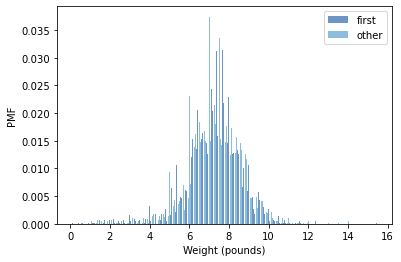

In [5]:
# We can plot the PMFs on the same scale, but it is hard to see if there is a difference.

width = 0.4 / 16

# plot PMFs of birth weights for first babies and others
thinkplot.PrePlot(2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='Weight (pounds)', ylabel='PMF')

In [7]:
# PercentileRank computes the fraction of scores less than or equal to your_score.

def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

In [16]:
t = [55, 66, 77, 88, 99]
PercentileRank(t, 80)

60.0

In [15]:
# Percentile takes a percentile rank and computes the corresponding percentile.

def Percentile(scores, percentile_rank):
    scores.sort()
    for score in scores:
        if PercentileRank(scores, score) >= percentile_rank:
            return score

In [20]:
# The median is the 50th percentile, which is 77.
Percentile(t, 50)

77

In [21]:
# Here's a more efficient way to compute percentiles.

def Percentile2(scores, percentile_rank):
    scores.sort()
    index = percentile_rank * (len(scores)-1) // 100
    return scores[index]

In [22]:
Percentile2(t, 50)

77

In [23]:
# The Cumulative Distribution Function (CDF) is almost the same as PercentileRank. The only difference is that the result is 0-1 instead of 0-100.

def EvalCdf(sample, x):
    count = 0.0
    for value in sample:
        if value <= x:
            count += 1

    prob = count / len(sample)
    return prob

In [24]:
t = [1, 2, 2, 3, 5]
EvalCdf(t, 0), EvalCdf(t, 1), EvalCdf(t, 2), EvalCdf(t, 3), EvalCdf(t, 4), EvalCdf(t, 5)

(0.0, 0.2, 0.6, 0.8, 0.8, 1.0)

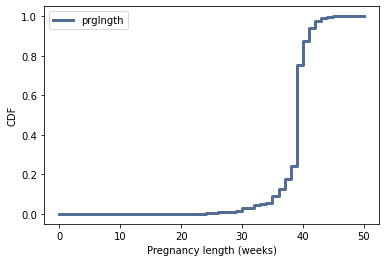

In [25]:
# Here's an example using real data, the distribution of pregnancy length for live births.

cdf = thinkstats2.Cdf(live.prglngth, label='prglngth')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Pregnancy length (weeks)', ylabel='CDF', loc='upper left')

In [26]:
# Cdf provides Prob, which evaluates the CDF; that is, it computes the fraction of values less than or equal to the given value. For example, 94% of pregnancy lengths are less than or equal to 41.

cdf.Prob(41)

0.9406427634455619

In [27]:
# Value evaluates the inverse CDF; given a fraction, it computes the corresponding value. For example, the median is the value that corresponds to 0.5.
cdf.Value(0.5)

39

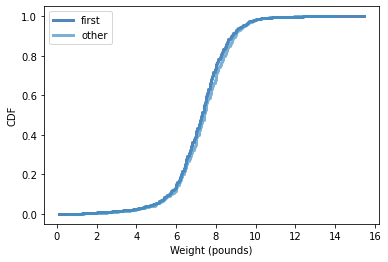

In [28]:
first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label='first')
other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label='other')

thinkplot.PrePlot(2)
thinkplot.Cdfs([first_cdf, other_cdf])
thinkplot.Config(xlabel='Weight (pounds)', ylabel='CDF')

In [25]:
# In this example, we can see that first babies are slightly, but consistently, lighter than others.

# We can use the CDF of birth weight to compute percentile-based statistics.

In [29]:
weights = live.totalwgt_lb
live_cdf = thinkstats2.Cdf(weights, label='live')

In [30]:
median = live_cdf.Percentile(50)
median

7.375

In [32]:
# The interquartile range is the interval from the 25th to 75th percentile.
iqr = (live_cdf.Percentile(25), live_cdf.Percentile(75))
iqr

(6.5, 8.125)

In [33]:
# We can use the CDF to look up the percentile rank of a particular value. For example, a child was 10.2 pounds at birth, which is near the 99th percentile.
live_cdf.PercentileRank(10.2)

98.82717415357381

In [34]:
# If we draw a random sample from the observed weights and map each weigh to its percentile rank.

sample = np.random.choice(weights, 100, replace=True)
ranks = [live_cdf.PercentileRank(x) for x in sample]

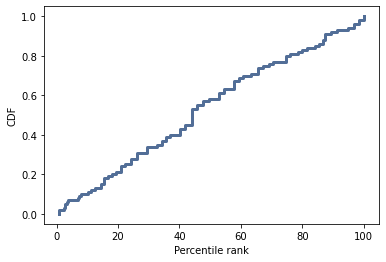

In [35]:
# The resulting list of ranks should be approximately uniform from 0-1.

rank_cdf = thinkstats2.Cdf(ranks)
thinkplot.Cdf(rank_cdf)
thinkplot.Config(xlabel='Percentile rank', ylabel='CDF')

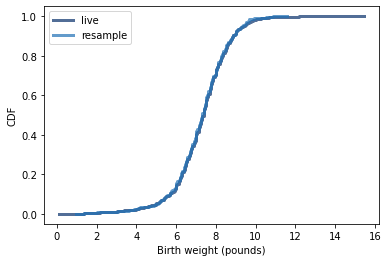

In [36]:
# That observation is the basis of Cdf.Sample, which generates a random sample from a Cdf. Here's an example.

resample = live_cdf.Sample(1000)
thinkplot.Cdf(live_cdf)
thinkplot.Cdf(thinkstats2.Cdf(resample, label='resample'))
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='CDF')

# This confirms that the random sample has the same distribution as the original data.